Project to perform sentiment analysis on the main headline of the BBC homepage. 

First need to scrape the headline and then pass through NLTK Vader. 

In [ ]:
#import libraries

import requests
import urllib.request
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


from time import sleep
from random import randint

In [ ]:
#Create a list containing a string that is the headline of the website

url = 'https://www.theguardian.com/world'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')
right_text = soup.find('a', class_="u-faux-block-link__overlay js-headline-text")

this_list = []

In [ ]:
right_text.text

"UK's daily Covid deaths rise by 367 to highest total since May"

In [ ]:
this_list.append(right_text.text)

In [ ]:
#Confirmation of the correct title

this_list

["UK's daily Covid deaths rise by 367 to highest total since May"]

In [ ]:
#Import vader

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
this_string = str(this_list)

In [ ]:
#Obtain sentiment score

sid.polarity_scores(this_string)

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
#Obtain the compound score

sid.polarity_scores(this_string)['compound']

0.0

In [ ]:
#Save as a variable for later

guardian_world = sid.polarity_scores(this_string)['compound']

## Now to run the same for the BBC World page

In [ ]:
url = 'https://www.bbc.co.uk/news/world'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')
right_text = soup.find('h3', class_="gs-c-promo-heading__title gel-paragon-bold gs-u-mt+ nw-o-link-split__text")

bbc_list = []

bbc_list.append(right_text.text)

sid = SentimentIntensityAnalyzer()

bbc_string = str(bbc_list)

bbc_world = sid.polarity_scores(bbc_string)['compound']

In [ ]:
bbc_world

0.0

## The Times Home Page

In [ ]:
url = 'https://www.thetimes.co.uk/'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')
right_text = soup.find('h3', class_="Item-headline Headline--xl")

times_list = []

times_list.append(right_text.text)

sid = SentimentIntensityAnalyzer()

times_string = str(times_list)

times = sid.polarity_scores(times_string)['compound']

## Visualise the Data

In [ ]:
list = [guardian_world, bbc_world, times]

df = pd.DataFrame(list)

df.reset_index()

#df.rename(columns={"0": "compound_scores"}, inplace=True)
df.rename(index={0: "Guardian", 1: "BBC", 2: "Times"}, inplace=True)
df

,0
Guardian,0.0
BBC,0.0
Times,0.0


[Text(0, 0.5, 'Compound score'), Text(0.5, 0, 'Publications')]

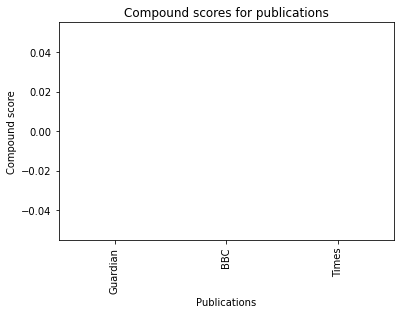

In [ ]:
ax = df.plot.bar(title='Compound scores for publications', legend=False)
ax.set(xlabel="Publications", ylabel="Compound score")

## Average of all 3 scores

This provides the average score of the 3 publications and an indication of the sentiment of news at this current moment. 

Note that this will change as soon as at least one of the publications change their headlines. Also headlines are very short and often provide very little information for the Vader library to interpret. 

In [ ]:
df.mean()



0    0.0
dtype: float64